In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers-prediction/BankChurners.csv


In [2]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


In [3]:

df = pd.read_csv('/kaggle/input/credit-card-customers-prediction/BankChurners.csv')
print("shape :",df.shape)
df.head()

shape : (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.drop(labels =['CLIENTNUM'],inplace =True, axis = 1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


EXPLORING THE DATA

In [5]:
df.dtypes

Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income_Category                                                                                                                        object
Card_C

In [6]:
df['Attrition_Flag'].replace({'Existing Customer' : 0 , 'Attrited Customer': 1},inplace = True)
df.rename(columns ={'Attrition_Flag': 'Churned'},inplace = True)
df.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
                  :'Bayes1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                  : 'Bayes2'}, inplace = True)
               

In [7]:
df.head()

,Churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
#separating categorical and continuous datatypes
cont_cols = df.select_dtypes(include = ['int64','float64'])
cat_cols = df.select_dtypes(include = ['object'])

In [9]:
cont_cols.head()

,Churned,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [10]:
cat_cols.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [11]:
cat_cols.isnull().sum()

Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
dtype: int64

In [12]:
cat_cols_names = list(cat_cols.columns)


In [13]:
cat_cols.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [14]:
#loop through the columns to find counts of categoricals values in each columns

for column in cat_cols[cat_cols_names]:
    counts = cat_cols[column].value_counts()
    values = counts.index
    print(f"Column: {column},\nValues: {values},'\nCounts :{counts}\n---------------------------------------------------------------'")
    

Column: Gender,
Values: Index(['F', 'M'], dtype='object'),'
Counts :F    5358
M    4769
Name: Gender, dtype: int64
---------------------------------------------------------------'
Column: Education_Level,
Values: Index(['Graduate', 'High School', 'Unknown', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'],
      dtype='object'),'
Counts :Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
---------------------------------------------------------------'
Column: Marital_Status,
Values: Index(['Married', 'Single', 'Unknown', 'Divorced'], dtype='object'),'
Counts :Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
---------------------------------------------------------------'
Column: Income_Category,
Values: Index(['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K',
       'Un

In [15]:
cat_cols_names

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [16]:
group = cat_cols_names
group.append('Churned')
group

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Churned']

In [17]:

another = pd.concat([cat_cols,df['Churned']], axis = 1)
another.head()



,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Churned
0,M,High School,Married,$60K - $80K,Blue,0
1,F,Graduate,Single,Less than $40K,Blue,0
2,M,Graduate,Married,$80K - $120K,Blue,0
3,F,High School,Unknown,Less than $40K,Blue,0
4,M,Uneducated,Married,$60K - $80K,Blue,0


In [18]:
#TO GAIN SENSE OF DATASET

for column in another[group]:
    print(another.groupby(column).mean(),'\n------------------------------------------------------------------------------')

         Churned
Gender          
F       0.173572
M       0.146152 
------------------------------------------------------------------------------
                  Churned
Education_Level          
College          0.152024
Doctorate        0.210643
Graduate         0.155691
High School      0.152012
Post-Graduate    0.178295
Uneducated       0.159381
Unknown          0.168532 
------------------------------------------------------------------------------
                 Churned
Marital_Status          
Divorced        0.161765
Married         0.151269
Single          0.169414
Unknown         0.172230 
------------------------------------------------------------------------------
                  Churned
Income_Category          
$120K +          0.173315
$40K - $60K      0.151397
$60K - $80K      0.134807
$80K - $120K     0.157655
Less than $40K   0.171862
Unknown          0.168165 
------------------------------------------------------------------------------
                Chur

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


Here every feature in cat_cols_names
can be one hot encoded

In [19]:
cat_cols_names.remove('Churned')

In [20]:
cat_cols.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [21]:


#applying encoding
ohe.fit(cat_cols[cat_cols_names].values)
encoded_cols = ohe.transform(cat_cols[cat_cols_names].values)


In [22]:
print(encoded_cols.shape)

type(encoded_cols)

(10127, 23)


scipy.sparse.csr.csr_matrix

In [23]:
encoded_array = encoded_cols.toarray()


In [24]:
encoded_df = pd.DataFrame(encoded_array)
print(encoded_df.shape)
encoded_df.head()

(10127, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


SUCCESSFULLY ONE HOT ENCODED

In [25]:
inverse_encoded = ohe.inverse_transform(encoded_array)
print(inverse_encoded.shape)

(10127, 5)


EXPLORING CONTINUOUS FEATURES

In [26]:
cont_cols.head()

,Churned,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [27]:
cont_cols_names = list(cont_cols.columns)
print(cont_cols_names)

['Churned', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Bayes1', 'Bayes2']


CHECKING THE CONTINUOUS FEATURES DISTRIBUTION THROUGH skew() and kurt() method AND LATER THROUGH VISUALISATION

In [28]:
import matplotlib.pyplot  as plt
import seaborn as sns
    

In [29]:
skew = []
kurt = []
for column in cont_cols_names:
    s = cont_cols[column].skew()
    k = cont_cols[column].kurt()
    skew.append(s)
    kurt.append(k)
  

In [30]:
skewness = pd.DataFrame(skew)
kurtosis = pd.DataFrame(kurt)


to_be_normalised = pd.DataFrame((skewness.iloc[:,0]<-0.6) | (skewness.iloc[:,0]>(0.6)))
to_be_normalised.rename({0: 'to_be_normalised'} ,axis = 1)
to_be_normalised.head()


,0
0,True
1,False
2,False
3,False
4,False


In [31]:
distribution = pd.concat([skewness, kurtosis, pd.DataFrame(cont_cols_names),to_be_normalised], 
                         axis = 1,
                         names = ['Skewness','Kurtosis','Columns','to_be_normalised']
                       )



In [32]:
print('S.N. SKEWNESS KURTOSIS    COLUMNS   to_be_normalised')
distribution.head(17)

S.N. SKEWNESS KURTOSIS    COLUMNS   to_be_normalised


,0,0,0,0
0,1.848449,1.417043,Churned,True
1,-0.033605,-0.288620,Customer_Age,False
2,-0.020826,-0.683017,Dependent_count,False
3,-0.106565,0.400100,Months_on_book,False
4,-0.162452,-1.006131,Total_Relationship_Count,False
5,0.633061,1.098523,Months_Inactive_12_mon,True
6,0.011006,0.000863,Contacts_Count_12_mon,False
7,1.666726,1.808989,Credit_Limit,True
8,-0.148837,-1.145992,Total_Revolving_Bal,False
9,1.661697,1.798617,Avg_Open_To_Buy,True


#### 

TIME TO EXPLORE CONTINUOUS FEATURES

In [33]:
import matplotlib.pyplot as plt

In [34]:
cont_cols_names.remove('Churned')

In [35]:
y = pd.DataFrame(df['Churned'])
y.head()

,Churned
0,0
1,0
2,0
3,0
4,0


In [36]:
norm_features = ['Contacts_Count_12_mon','Total_Revolving_Bal','Months_Inactive_12_mon'
                 'Total_Trans_Amt','Avg_Open_To_Buy'
                 'Total_Trans_Ct','Avg_Utilization_Ratio','Bayes1','Bayes2','Credit_Limit','Total_Relationship_Count'
                ]
stan_features = ['Customer_Age','Total_Amt_Chng_Q4_Q1'
    'Dependent_count','Months_on_book','Total_Ct_Chng_Q4_Q1']

In [37]:
cont_cols_names

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Bayes1',
 'Bayes2']

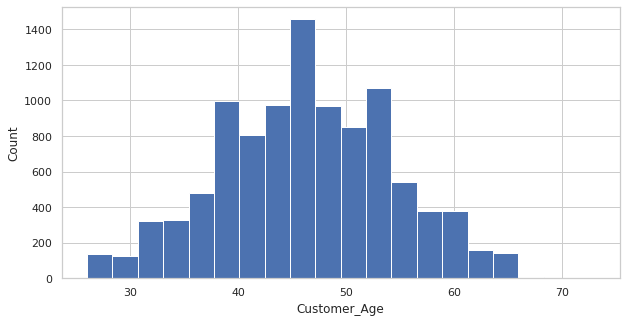

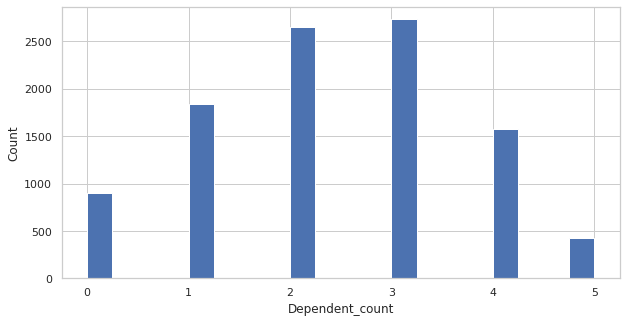

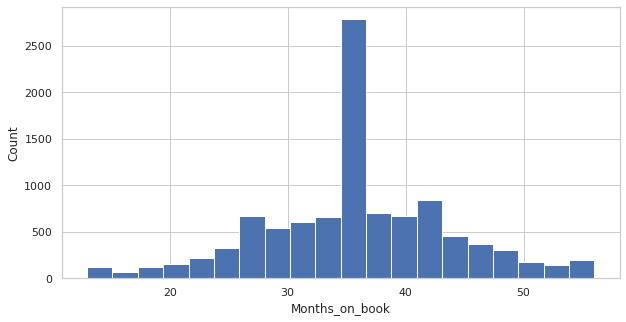

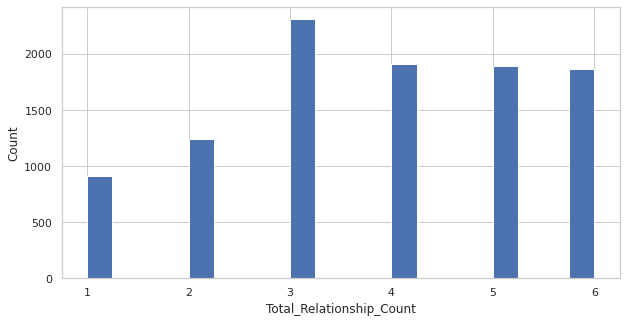

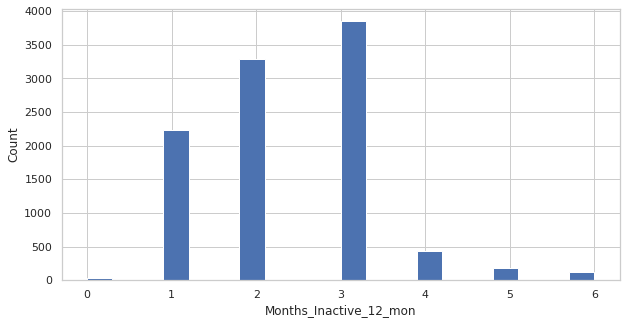

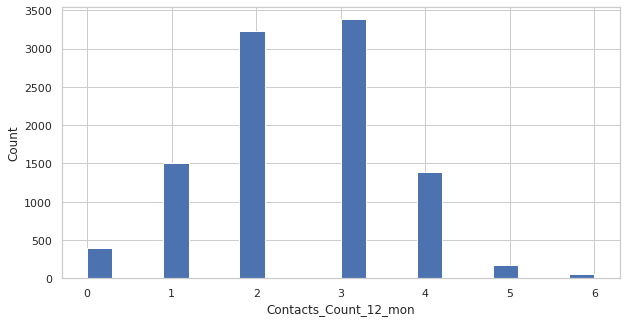

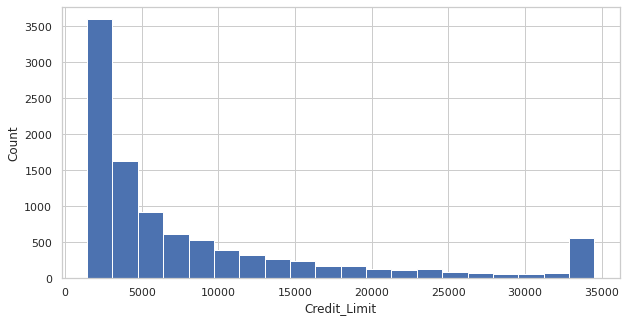

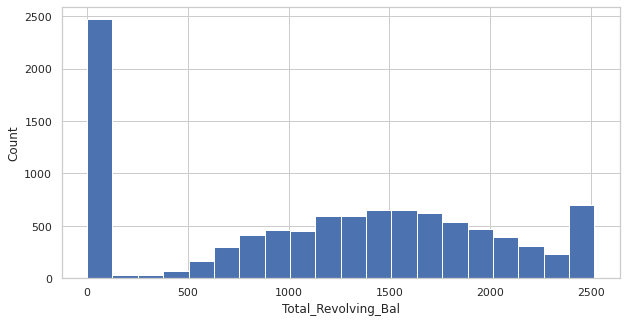

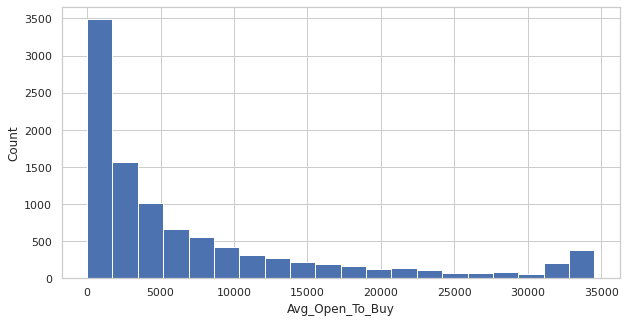

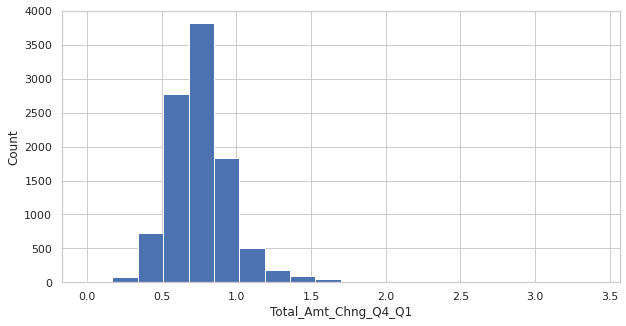

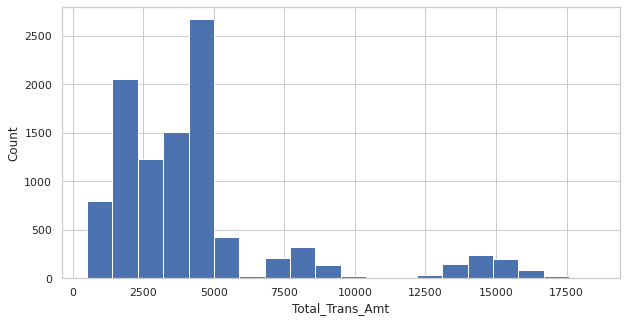

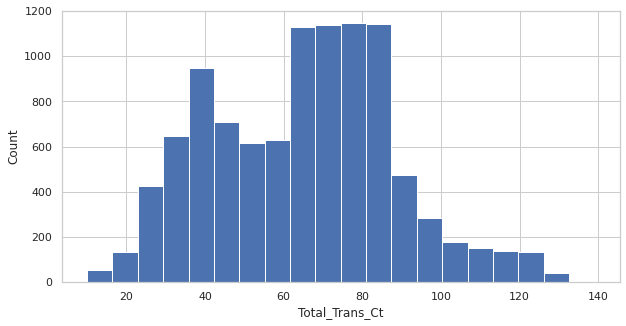

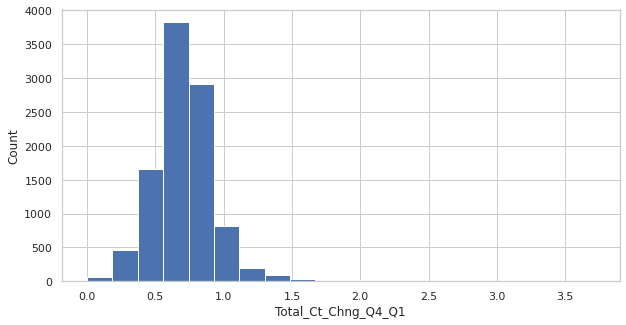

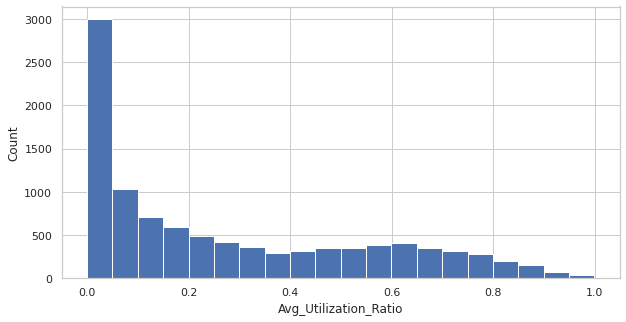

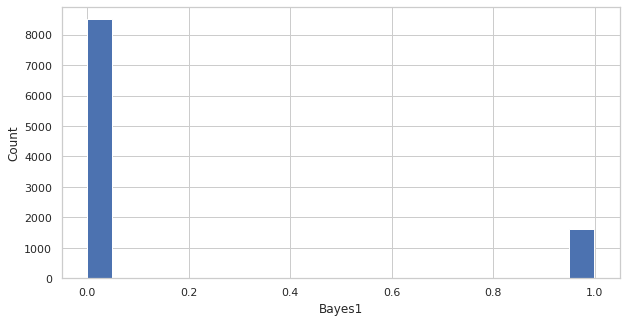

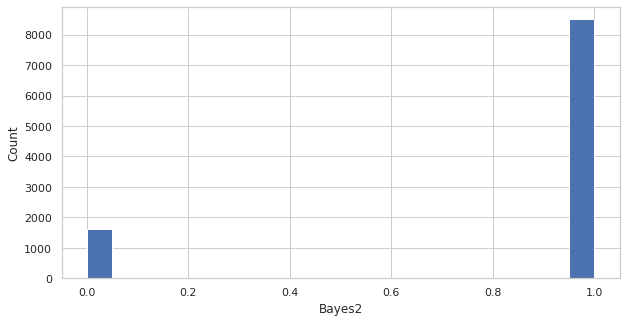

In [38]:
for column in cont_cols_names:
    plt.figure(figsize=(10,5))
    sns.set_theme(style='whitegrid')
    plt.hist(cont_cols[column], bins = 20)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [39]:
cont_cols_names

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Bayes1',
 'Bayes2']

In [40]:
cat_cols.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


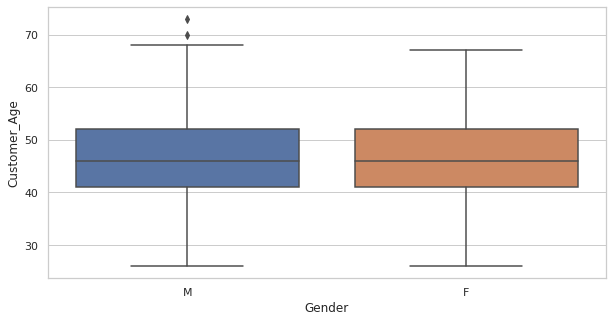

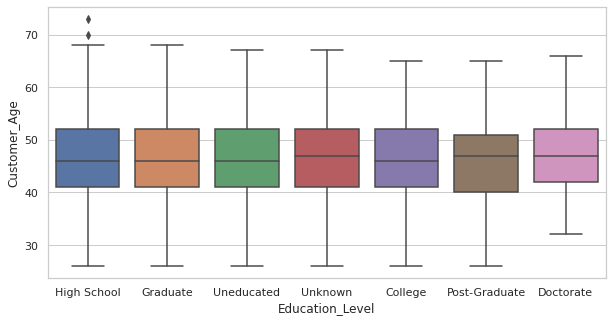

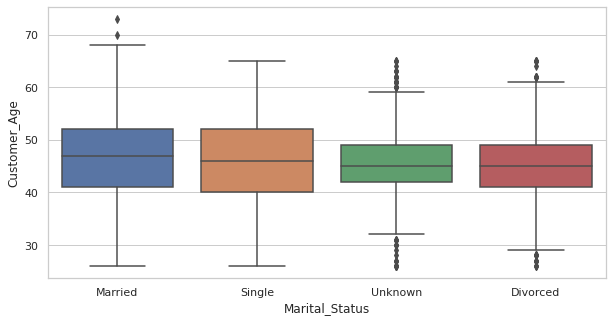

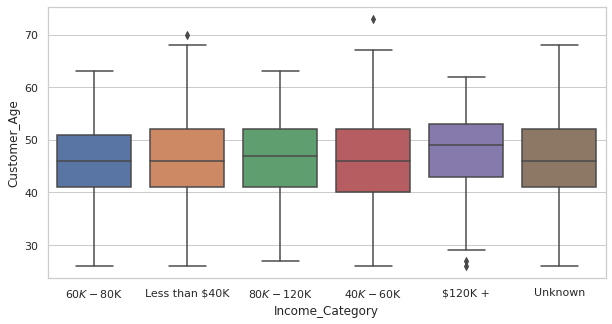

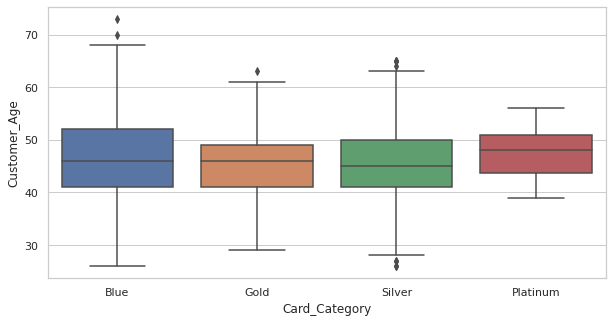

In [41]:
for cat in cat_cols_names:
    plt.figure(figsize=(10,5))
    sns.set_theme(style='whitegrid')
    sns.boxplot(x = cat, y = 'Customer_Age', data = df)
    plt.xlabel(cat)
    plt.ylabel('Customer_Age')
    plt.show()

So, after one hot encoding categorical features, there were increased no of rows and columns

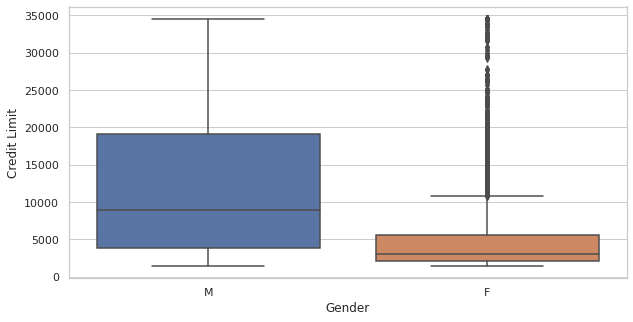

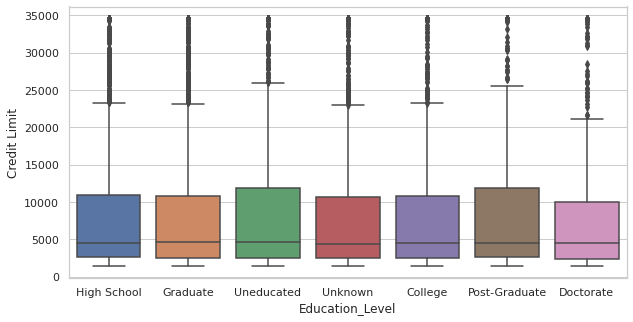

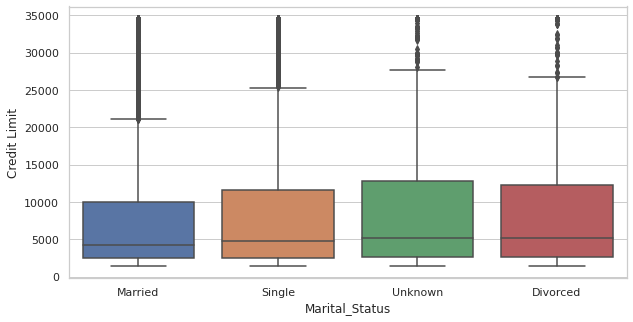

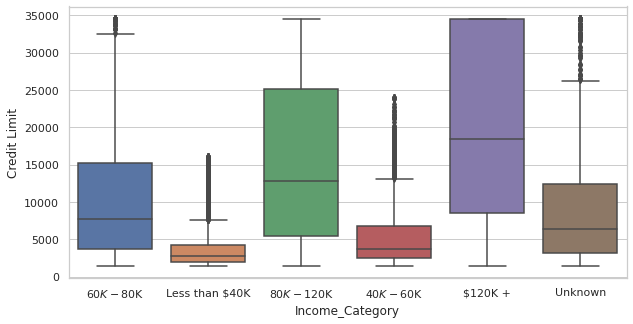

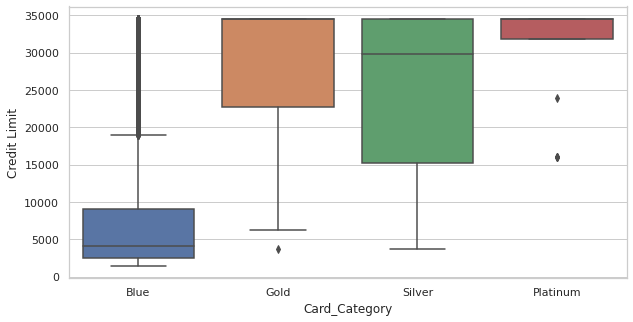

In [42]:
for cat in cat_cols_names:
    plt.figure(figsize=(10,5))
    sns.set_theme(style='whitegrid')
    sns.boxplot(x = cat, y = 'Credit_Limit' , data = df)
    plt.xlabel(cat)
    plt.ylabel('Credit Limit')
    plt.show()

In [43]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

It is generally recommended to split the data into training, validation, and test sets before performing normalization. This is because normalization is a data-dependent process, and the statistics used to scale the data (such as the mean and standard deviation) should be calculated using only the training data.

In [44]:
cont_cols.drop(labels = ['Churned'], axis = 1, inplace = True)
cont_cols.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [45]:
#CONCATENATING CATEGORICAL AND CONTINUOUS FEATURES
X = pd.concat([cont_cols , encoded_df],axis =1 )
print(X.shape)
X.head(3)


(10127, 39)


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,13,14,15,16,17,18,19,20,21,22
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
X.dtypes

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Bayes1                      float64
Bayes2                      float64
0                           float64
1                           float64
2                           float64
3                           float64
4                           float64
5                           float64
6                           float64
7                           float64
8                           float64
9                           float64
10                          float64
11                          

In [47]:
y.head(2)

,Churned
0,0
1,0


NORMALISING THE DATASET

In [48]:
X_train, X_val1, y_train, y_val1 = train_test_split(X,y,test_size =0.4, train_size = 0.6 , random_state=0)
X_test, X_val , y_test , y_val = train_test_split(X_val1, y_val1, test_size = .5, random_state = 0)

In [49]:
X_train.shape, X_test.shape , X_val.shape

((6076, 39), (2025, 39), (2026, 39))

In [50]:
scaler = RobustScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
X_val_norm = scaler.fit_transform(X_val)

y_train_norm = scaler.fit_transform(y_train)
y_test_norm = scaler.fit_transform(y_test)
y_val_norm = scaler.fit_transform(y_val)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

In [51]:
X_train_norm.shape

(6076, 39)

**FINALLY TRAIN THE MODEL**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIST

LogisticRegression()

In [53]:
score_on_train = lr.score(X_train, y_train) #seeing how it did on training set
print('The model scored {} on training set'.format(score_on_train*100))

The model scored 91.40882159315339 on training set


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [54]:
score_on_val = lr.score(X_val, y_val)    #seeing how it did on validation set
print('The model scored {} on validation set'.format(score_on_train*100))

The model scored 91.40882159315339 on validation set


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [55]:
y_pred = lr.predict(X_test)     #predicting results


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [56]:
accuracy_score(y_test, y_pred)  #seeing how it did on test set
print('The model scored {} on testing set'.format(score_on_train*100))

The model scored 91.40882159315339 on testing set


The model scored 91.4% on training set, 91.21% on cross-validation set and 92.04% on testing set.

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


In [58]:
gbc.fit(X_train,y_train)
score_train = gbc.score(X_train,y_train)
y_pred_val = gbc.predict(X_val)
score_val = accuracy_score(y_pred_val,y_val)
y_pred = gbc.predict(X_test)
score_test = accuracy_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/s

In [59]:
print('The model scored {} on training set'.format(score_train*100))
print('The model scored {} on val set'.format(score_val*100))
print('The model scored {} on test set'.format(score_test*100))

The model scored 100.0 on training set
The model scored 100.0 on val set
The model scored 100.0 on test set
